In [1]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [2]:
df = pd.read_csv('Casas_Guaruja.csv', sep=';')

In [3]:
df

,value,areas,bedrooms,spaces,bathrooms
0,134990.0,32.0,1.0,0.0,1.0
1,222000.0,46.0,2.0,1.0,1.0
2,682500.0,67.0,2.0,1.0,NaN
3,6500000.0,1000.0,6.0,4.0,8.0
4,2600000.0,592.0,4.0,10.0,6.0
...,...,...,...,...,...
1675,1600000.0,280.0,4.0,NaN,4.0
1676,950000.0,180.0,3.0,3.0,3.0
1677,1500000.0,500.0,4.0,8.0,6.0
1678,955000.0,220.0,4.0,NaN,4.0


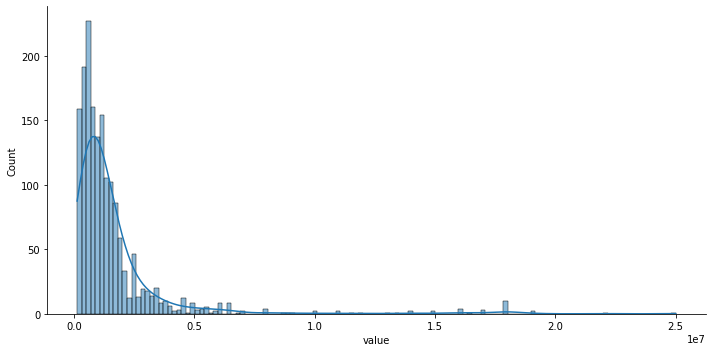

In [4]:
sns.displot(data=df['value'], aspect=2, kde=True)

In [5]:
df['value'].quantile(0.98)

9420000.000000073

In [6]:
casas_baratas = df.loc[df['value']<9420000]

In [7]:
df.describe()

,value,areas,bedrooms,spaces,bathrooms
count,1.680000e+03,1680.000000,1680.000000,1627.000000,1678.000000
mean,1.637965e+06,339.272619,3.973810,3.652735,4.265197
std,2.445190e+06,289.011005,1.453026,1.900799,2.192167
min,1.349900e+05,32.000000,1.000000,0.000000,1.000000
25%,5.800000e+05,180.000000,3.000000,2.000000,3.000000
50%,1.000000e+06,292.000000,4.000000,4.000000,4.000000
75%,1.700000e+06,414.250000,5.000000,4.000000,6.000000
max,2.500000e+07,5420.000000,10.000000,15.000000,15.000000


In [8]:
casas_baratas['value'] = casas_baratas['value']/1000

C:\Users\flpss\AppData\Local\Temp/ipykernel_13700/2017651196.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  casas_baratas['value'] = casas_baratas['value']/1000


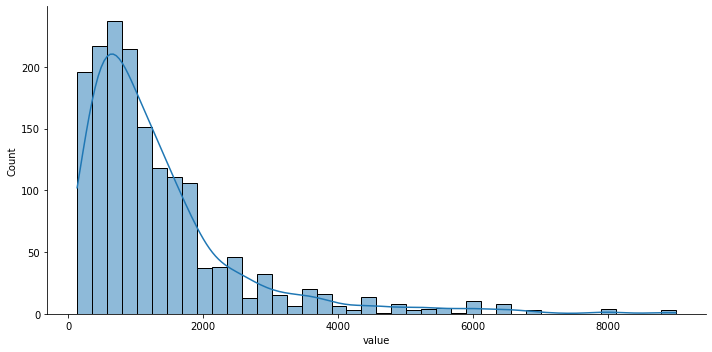

In [9]:
sns.displot(data=casas_baratas['value'], aspect=2, kde=True, bins=40)

In [10]:
casas_baratas

,value,areas,bedrooms,spaces,bathrooms
0,134.99,32.0,1.0,0.0,1.0
1,222.00,46.0,2.0,1.0,1.0
2,682.50,67.0,2.0,1.0,NaN
3,6500.00,1000.0,6.0,4.0,8.0
4,2600.00,592.0,4.0,10.0,6.0
...,...,...,...,...,...
1675,1600.00,280.0,4.0,NaN,4.0
1676,950.00,180.0,3.0,3.0,3.0
1677,1500.00,500.0,4.0,8.0,6.0
1678,955.00,220.0,4.0,NaN,4.0


<AxesSubplot:xlabel='value'>

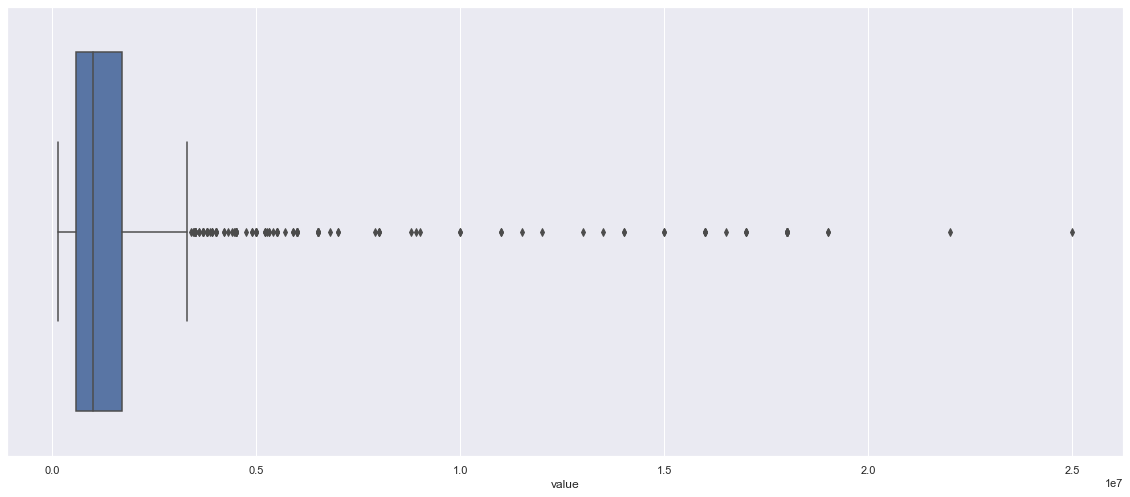

In [11]:


sns.set(rc={'figure.figsize':(20,8.27)})
ax = sns.boxplot(data=df, x='value')
ax

In [12]:
casas_baratas_sem_na= casas_baratas.fillna(method='ffill')

In [13]:
#X_train

In [14]:
casas_baratas_sem_na['value'] = np.log(casas_baratas_sem_na['value'])

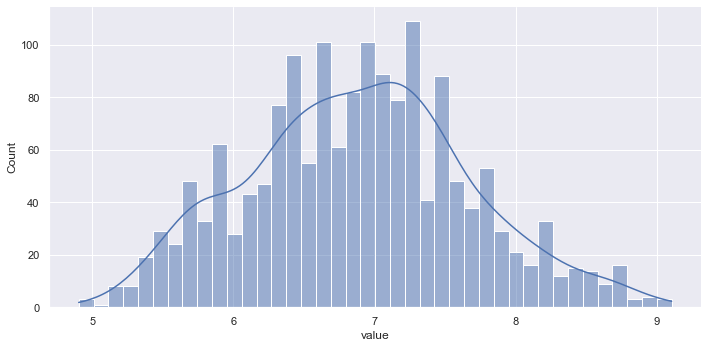

In [15]:
sns.displot(data=casas_baratas_sem_na['value'], aspect=2, kde=True, bins=40)

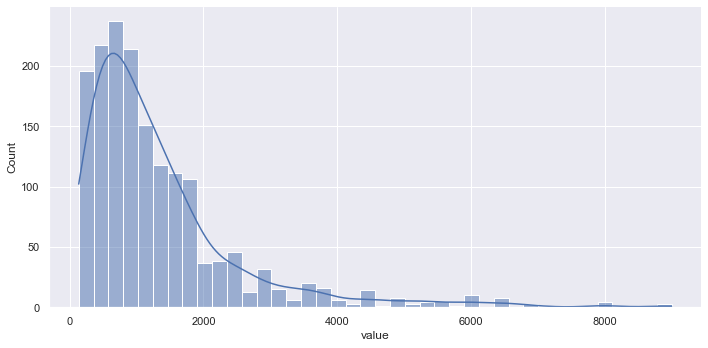

In [16]:
sns.displot(data=casas_baratas['value'], aspect=2, kde=True, bins=40)

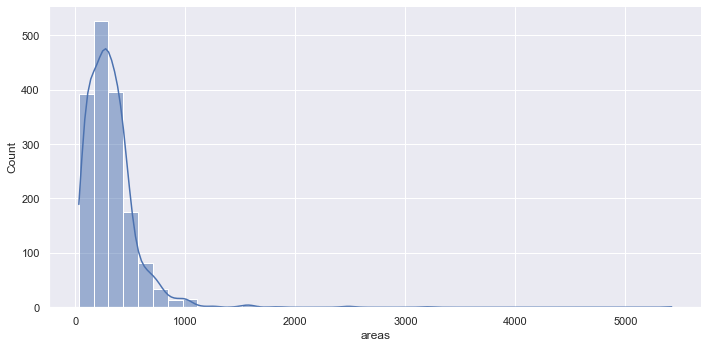

In [17]:
sns.displot(data=casas_baratas['areas'], aspect=2, kde=True, bins=40)

In [19]:
casas_baratas_sem_na.describe()

,value,areas,bedrooms,spaces,bathrooms
count,1646.000000,1646.000000,1646.000000,1646.000000,1646.000000
mean,6.886521,322.419198,3.892467,3.593560,4.139733
std,0.785866,260.696174,1.330943,1.830025,2.009379
min,4.905201,32.000000,1.000000,0.000000,1.000000
25%,6.345636,174.250000,3.000000,2.000000,3.000000
50%,6.897705,290.000000,4.000000,4.000000,4.000000
75%,7.377759,400.000000,5.000000,4.000000,5.000000
max,9.104980,5420.000000,10.000000,15.000000,13.000000


In [20]:
casas_baratas_sem_na['spaces'] = casas_baratas_sem_na['spaces'] + 1
casas_baratas_sem_na.describe()

,value,areas,bedrooms,spaces,bathrooms
count,1646.000000,1646.000000,1646.000000,1646.000000,1646.000000
mean,6.886521,322.419198,3.892467,4.593560,4.139733
std,0.785866,260.696174,1.330943,1.830025,2.009379
min,4.905201,32.000000,1.000000,1.000000,1.000000
25%,6.345636,174.250000,3.000000,3.000000,3.000000
50%,6.897705,290.000000,4.000000,5.000000,4.000000
75%,7.377759,400.000000,5.000000,5.000000,5.000000
max,9.104980,5420.000000,10.000000,16.000000,13.000000


In [21]:
casas_baratas_sem_na[['areas', 'bedrooms', 'spaces', 'bathrooms']] = np.log(casas_baratas_sem_na[['areas', 'bedrooms', 'spaces', 'bathrooms']])

In [22]:
casas_baratas_sem_na.describe()

,value,areas,bedrooms,spaces,bathrooms
count,1646.000000,1646.000000,1646.000000,1646.000000,1646.000000
mean,6.886521,5.553546,1.300975,1.442488,1.285506
std,0.785866,0.681672,0.346258,0.417176,0.552910
min,4.905201,3.465736,0.000000,0.000000,0.000000
25%,6.345636,5.160488,1.098612,1.098612,1.098612
50%,6.897705,5.669881,1.386294,1.609438,1.386294
75%,7.377759,5.991465,1.609438,1.609438,1.609438
max,9.104980,8.597851,2.302585,2.772589,2.564949


# modelo

In [23]:
X_train, X_test, y_train, y_teste = train_test_split(casas_baratas_sem_na.drop(columns=['value']), casas_baratas_sem_na['value'])

In [25]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [26]:
modelo.score(X_test, y_teste)

0.7225256315008763

In [30]:
X = casas_baratas_sem_na.drop(columns=['value'])
y = casas_baratas_sem_na['value']

In [33]:
modelo_estatistico = sm.OLS(y, X)

In [34]:
res = modelo_estatistico.fit()

In [36]:
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                  value   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                          7.781e+04
Date:                Mon, 19 Jul 2021   Prob (F-statistic):                        0.00
Time:                        10:43:56   Log-Likelihood:                         -1201.6
No. Observations:                1646   AIC:                                      2411.
Df Residuals:                    1642   BIC:                                      2433.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [47]:
Xnovo = casas_baratas_sem_na.drop(columns=['value', 'spaces'])
modelo_estatistico_sem_spaces = sm.OLS(y, Xnovo)
res_novo = modelo_estatistico_sem_spaces.fit()

In [48]:
print(res_novo.summary())

                                 OLS Regression Results                                
Dep. Variable:                  value   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                          1.038e+05
Date:                Mon, 19 Jul 2021   Prob (F-statistic):                        0.00
Time:                        11:03:56   Log-Likelihood:                         -1201.7
No. Observations:                1646   AIC:                                      2409.
Df Residuals:                    1643   BIC:                                      2426.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [51]:
X_train_novo = X_train.drop(columns=['spaces'])
X_test_novo = X_test.drop(columns=['spaces'])

In [52]:
modelo_novo = LinearRegression()
modelo_novo.fit(X_train_novo, y_train)
modelo_novo.score(X_test_novo, y_teste)

0.7171720226787126

<AxesSubplot:xlabel='areas', ylabel='value'>

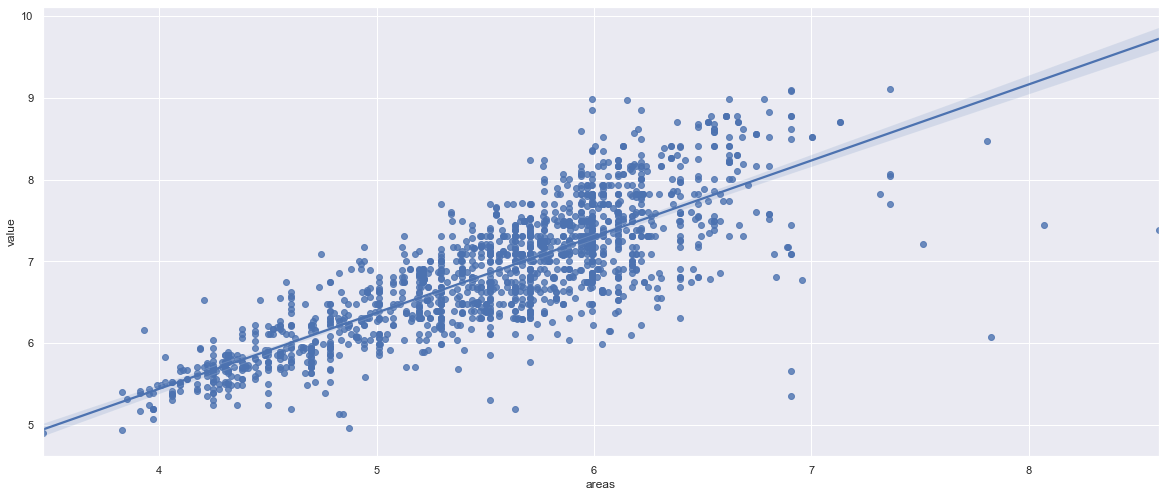

In [53]:
sns.regplot(x=casas_baratas_sem_na['areas'], y=casas_baratas_sem_na['value'] )

<AxesSubplot:xlabel='bedrooms', ylabel='value'>

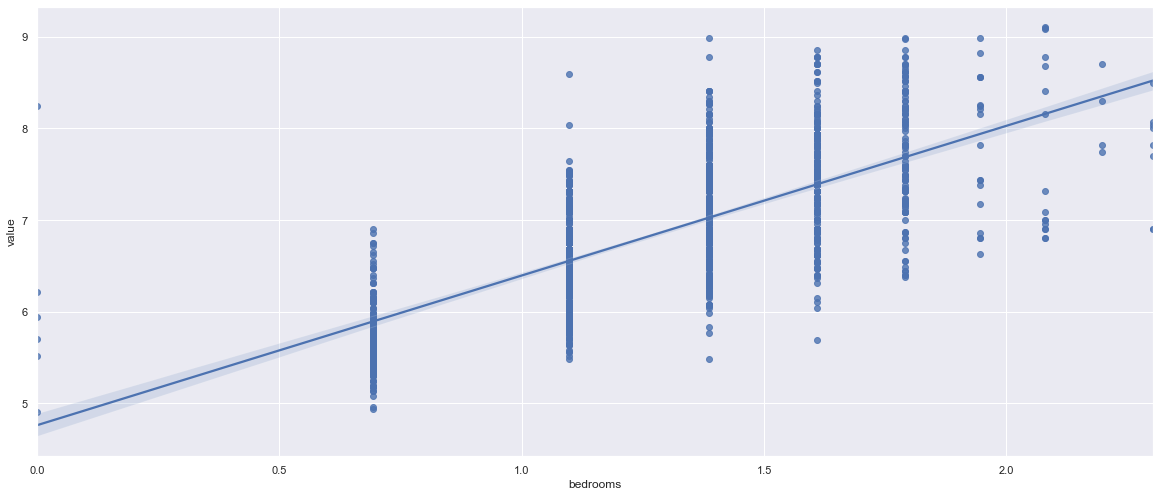

In [55]:
sns.regplot(x=casas_baratas_sem_na['bedrooms'], y=casas_baratas_sem_na['value'] )